## --------------------------EDA on Titanic Survival Prediction------------------------------

## Importing the dependencies

### 1) Numpy
NumPy (np):(Numairical Python) A powerful library for numerical computing in Python. 
It provides support for large, multi-dimensional arrays and matrices, 
along with a collection of mathematical functions to operate on these arrays.
#### What is Array?
Array is a linear data structure where all elements are arranged sequentially. It is a collection of elements of same data type stored at contiguous memory locations. 

In [1]:
# importing numpy
import numpy as np

### 2) Pandas
Pandas (pd): A library for data manipulation and analysis.
It provides data structures like DataFrame and Series that are used for handling and analyzing structured data.
#### Q.1: What is Data structure in python?
A data structure is a specialized format for organizing, processing, retrieving and storing data.

In [2]:
#importing Pands
import  pandas as pd

### 3) Matplotlib
Matplotlib (plt): A plotting library for creating static, interactive,
and animated visualizations in Python. It's often used for creating basic graphs and plots.

In [3]:
# Importing matplotlib.pyplot
import matplotlib.pyplot as plt

### 4) Seaborn
Seaborn (sns): A statistical data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [4]:
# importing seaborn library
import seaborn as sns

### 5) Machine Learning Toolkit:
These lines import specific functions and classes from the scikit-learn library, which is a powerful toolkit for machine learning in Python:            
1). train_test_split: A function that splits your dataset into training and testing sets. This is a common step in machine learning to evaluate the performance of a model on unseen data.                                                                                                                  
2). LogisticRegression: A class for implementing logistic regression, which is a popular algorithm for binary classification problems (e.g., predicting whether an email is spam or not).                                                                                                                       
3). accuracy_score: A function that calculates the accuracy of a model by comparing the predicted labels with the actual labels. It's a common metric for evaluating classification models.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import accuracy_score

## Data Collection and processing

In [8]:
#### Laod the data from CSV file to panda dataframe
titanic_data=pd.read_csv('train.csv')

#### Q_No.1) What is Data Frame ?
A DataFrame in Python is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). It is a fundamental data structure provided by the pandas library, which is widely used for data analysis and manipulation.


#### Pandas_ Pd.read() _function
The pd.read() function in pandas is a prefix for several specific functions used to read various types of data into a pandas DataFrame. These functions are typically used to import data from different file formats, such as CSV, Excel, JSON, SQL databases, and more.

In [9]:
# Printing firt five rows of data frame
# .head():This function is used as to print the first five function of data frame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### How to find totle numbers of rows and coulumn in data set ?
The .shape attribute in pandas (and also in NumPy) is used to get the dimensions of a DataFrame (or an array in NumPy). It returns a tuple representing the dimensions of the DataFrame, where the first element is the number of rows and the second element is the number of columns.

In [10]:
titanic_data.shape # the data set contains 891 rows and 12 coulumn

(891, 12)

#### The .info() method/function:
The .info() function in pandas is a useful method for quickly getting a summary of a DataFrame, including information about the columns, data types, and non-null values. It's particularly helpful when you want to understand the structure and completeness of your dataset.

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Checking Number of missing vlaues in each coulumn

To check the number of missing values in each column of a DataFrame, you can use the .isnull() function combined with the .sum() function.

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling Missing Values

In [13]:
# drop the "Cabin" column becouse it contain very less values and most of values are missing
#titanic_data= titanic_data.drop(columns='Cabin', axis=1)
# axis=1 is used for droping column and axis=0 is used for droping rows
titanic_data = titanic_data.drop(columns='Cabin')

In [14]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
# replacing missing values in age column with mean value of that column
#titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_10596\3311826306.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)


In [16]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
# Now we have to find the vlaues that are repeated most in embarked
# which can be find my finding mode vlaue(vlues repeated most number of time) 
#of "Embarked" column
print(titanic_data['Embarked'].mode())


0    S
Name: Embarked, dtype: object


In [18]:
print(titanic_data['Embarked'].mode()[0])

S


In [19]:
# Replacing the missing vlues in "Embarked" Coulumn with mode vlaue
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace= True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10596\4167086580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace= True)


In [20]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

#### Discribe method or function:
The titanic_data.describe() function in pandas provides a statistical summary of the numerical columns in the DataFrame titanic_data. Here's what each part of the output typically represents:
What describe() Includes:
Count:
The number of non-null (non-missing) entries in each column.
Mean:
The average value of the data in the column.
Std (Standard Deviation):
A measure of how spread out the numbers in the column are around the mean.
Min:
The minimum value in the column.
25% (First Quartile / Q1):
The value below which 25% of the data falls.
50% (Median / Q2):
The value below which 50% of the data falls; it’s also known as the median.
75% (Third Quartile / Q3):
The value below which 75% of the data falls.
Max:
The maximum value in the column.

In [21]:
# getting some statistical measures about data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Finding the no of people survived and not survived 

In [22]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Data Visualization

#### Seaborn Library:
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

##### Funtion_Sns.set()
this function is used to set theme

In [23]:
sns.set()

#### seaborn.countplot
seaborn.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)
Show the counts of observations in each categorical bin using bars.

<Axes: xlabel='Survived', ylabel='count'>

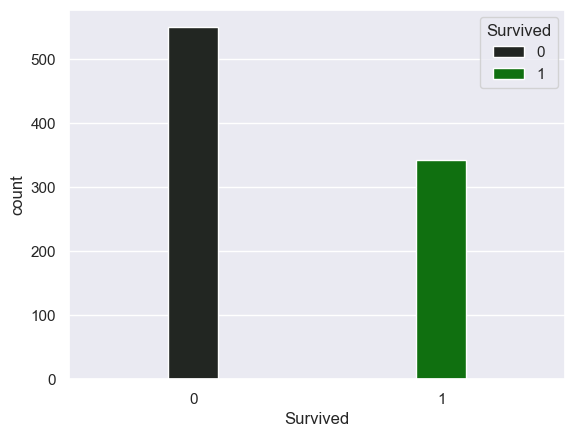

In [24]:
# Making a Count plot for Survived columna
sns.countplot(titanic_data, x='Survived',hue='Survived',color='yellow',width=0.2, palette='dark:Green',gap=2,)

<Axes: xlabel='Sex', ylabel='count'>

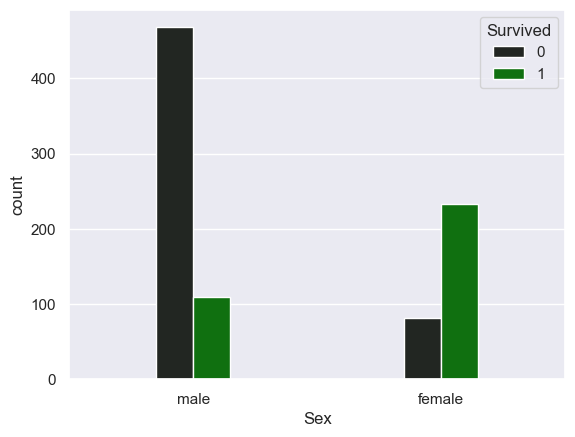

In [25]:
# Comparison of survival based on gender
sns.countplot(titanic_data, x='Sex',hue='Survived',color='yellow',width=0.3, palette='dark:Green',gap=2,)

<Axes: xlabel='Pclass', ylabel='count'>

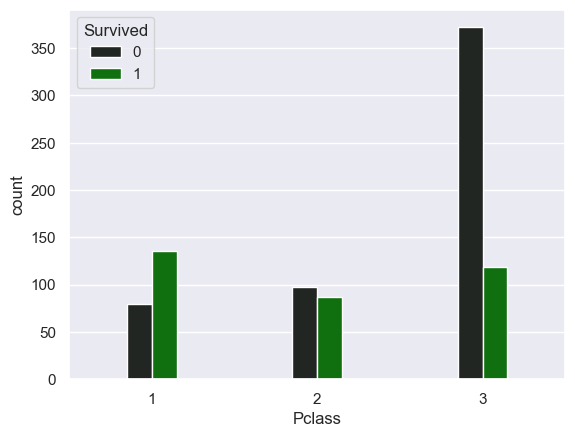

In [26]:
# Comparison of survival based on gender
sns.countplot(titanic_data, x='Pclass',hue='Survived',color='yellow',width=0.3, palette='dark:Green',gap=2,)

<Axes: xlabel='Embarked', ylabel='count'>

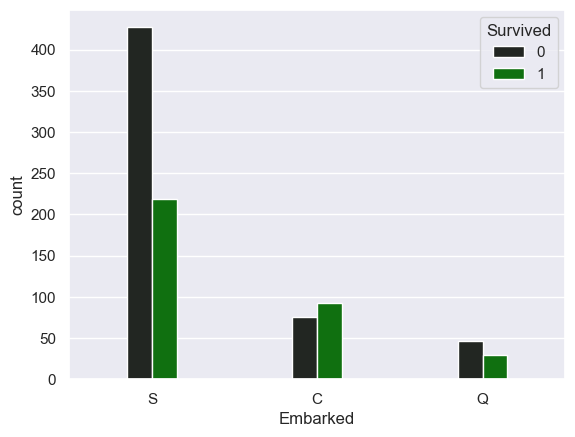

In [27]:
# Comparison of survival based on gender
sns.countplot(titanic_data, x='Embarked',hue='Survived',color='yellow',width=0.3, palette='dark:Green',gap=2,)

#### Creating New feature

In [28]:
# Create a new feature for Family Sizea
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


#### Encoding the catogorical columns

#### Finding catagorical columns

In [29]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [31]:
# Converting Categorical columns
# Corrected code using separate replace calls
# Corrected code using map function
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})


In [32]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1


In [33]:
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [34]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,1


#### Seperated features and Target

In [35]:
X = titanic_data.drop (columns= ['PassengerId','Name','Ticket','Survived'])
Y= titanic_data['Survived']

In [36]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,0,22.0,1,0,7.2500,0,2
1,1,1,38.0,1,0,71.2833,1,2
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,2
4,3,0,35.0,0,0,8.0500,0,1


In [37]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#### Splitting data into training data and Testing data

In [38]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


In [40]:
print(X_train)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked  FamilySize
30        1    0  40.000000      0      0   27.7208         1           1
10        3    1   4.000000      1      1   16.7000         0           3
873       3    0  47.000000      0      0    9.0000         0           1
182       3    0   9.000000      4      2   31.3875         0           7
876       3    0  20.000000      0      0    9.8458         0           1
..      ...  ...        ...    ...    ...       ...       ...         ...
534       3    1  30.000000      0      0    8.6625         0           1
584       3    0  29.699118      0      0    8.7125         1           1
493       1    0  71.000000      0      0   49.5042         1           1
527       1    0  29.699118      0      0  221.7792         0           1
168       1    0  29.699118      0      0   25.9250         0           1

[712 rows x 8 columns]


#### Model Training

#### Logistic Regression Model

In [52]:
# training logistic regression model with training data
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

In [53]:
X_train_Prediction = log_reg.predict(X_train)

In [54]:
print(X_train_Prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [55]:
training_data_accuracy= accuracy_score(Y_train,X_train_Prediction)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.8089887640449438


### Accuracy of training Data is 80.89%

 #### Model Evoluations

In [56]:
# accuracy on test data 
X_test_Prediction = log_reg.predict(X_test)

In [57]:
print(X_test_Prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [59]:
test_data_accuracy= accuracy_score(Y_test,X_test_Prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7821229050279329


### Accuracy of Testing Data is 78.2%